In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import auc


In [13]:
prob = "LunarLander"
window_size = 10
nb_episodes = 300


In [14]:
def compute_auc_and_std(data, nb_episodes):
    # data = np.load(filepath, allow_pickle=True)
    all_returns = data['episode_rewards']  # shape: (n_seeds, n_episodes)
    # print("all_returns ", all_returns, "\n")
    
    # print("all_returns shape:", all_returns.shape, "\n")
    aucs = []
    for rewards in all_returns:
        returns = rewards[:nb_episodes]
        x = np.arange(len(returns))
        aucs.append(auc(x, returns))

    auc_mean = np.mean(aucs)
    auc_std = np.std(aucs)
    return auc_mean, auc_std


In [ ]:
base_path = f"C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\Results\\{prob}"



### Plot subfigures



In [16]:
LL_dict_auc_mean = {}
LL_dict_auc_std = {}


QRNN-ASNN-PF: AUC = -48587.72 ± 17147.57
QRNN-basic-PF: AUC = -51911.79 ± 22503.81
QRNN-rnd-PF: AUC = -51796.42 ± 20282.50
QRNN-RS: AUC = -84800.03 ± 48710.93
50NN-ASNN-PF: AUC = -45510.71 ± 13709.11
50NN-basic-PF: AUC = -237153.22 ± 98016.51
50NN-rnd-PF: AUC = -50685.63 ± 24348.51
50NN-RS: AUC = -79663.60 ± 45101.08
MSENN-ASNN-PF: AUC = -68139.01 ± 30516.77
MSENN-basic-PF: AUC = -59295.08 ± 25582.97
MSENN-rnd-PF: AUC = -59780.33 ± 26732.23
MSENN-RS: AUC = -121314.94 ± 57540.93
############################################################# 

QRNN-ASNN-CEM: AUC = -42705.73 ± 11515.52
QRNN-basic-CEM: AUC = -46083.07 ± 14078.49
QRNN-rnd-CEM: AUC = -39717.68 ± 10104.95
50NN-ASNN-CEM: AUC = -44834.81 ± 11295.70
50NN-basic-CEM: AUC = -107406.96 ± 28496.87
50NN-rnd-CEM: AUC = -46379.54 ± 8400.29
MSENN-ASNN-CEM: AUC = -59763.88 ± 20532.07
MSENN-basic-CEM: AUC = -59323.06 ± 22940.22
MSENN-rnd-CEM: AUC = -57459.30 ± 19774.73
############################################################# 

DQN: AUC

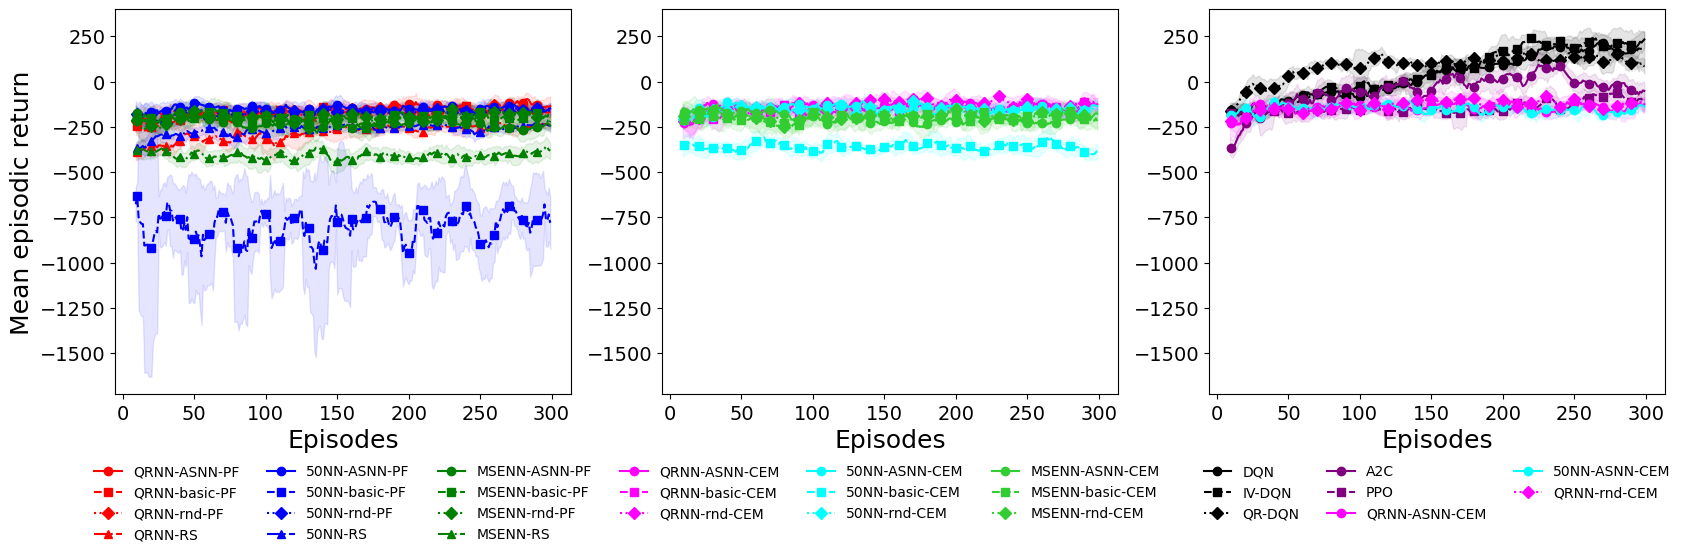

In [17]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)

plt.rcParams.update({'font.size': 20})
for i, ax in enumerate(axs):
    # ax.plot([1, 2, 3], [j*(i+1) for j in [1, 4, 9]])
    # ax.set_title(f"Plot {i+1}", fontsize=20)
    ax.set_xlabel("Episodes", fontsize=18)
    ax.tick_params(axis='both', labelsize=14)
    ax.yaxis.set_tick_params(labelleft=True)

axs[0].set_ylabel("Mean episodic return", fontsize=18)

QRNN = {'QRNN-ASNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June25.npz',
    'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_June21.npz',
    'QRNN-rnd-PF': f'{base_path}\\{prob}_MPC_QRNN_random_mid_June21.npz',
    'QRNN-RS': f'{base_path}\\{prob}_RS_mid_QRNN_June21.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    LL_dict_auc_mean[label] = auc_mean
    LL_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

FiftyNN = {'50NN-ASNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_June25.npz',
    '50NN-basic-PF': f'{base_path}\\{prob}_MPC_50NN_basic_mid_June21.npz',
    '50NN-rnd-PF': f'{base_path}\\{prob}_MPC_50NN_random_mid_June21.npz',
    '50NN-RS': f'{base_path}\\{prob}_RS_mid_50NN_June21.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    LL_dict_auc_mean[label] = auc_mean
    LL_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

MSENN = {'MSENN-ASNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June25.npz',
    'MSENN-basic-PF': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_June21.npz',
    'MSENN-rnd-PF': f'{base_path}\\{prob}_MPC_MSENN_random_mid_June21.npz',
    'MSENN-RS': f'{base_path}\\{prob}_RS_mid_MSENN_June21.npz'}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    LL_dict_auc_mean[label] = auc_mean
    LL_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

# from matplotlib.lines import Line2D

# custom_legend = [
#     Line2D([0], [0], color='red', lw=2, label='QRNN'),
#     Line2D([0], [0], color='blue', lw=2, label='50NN'),
#     Line2D([0], [0], color='green', lw=2, label='MSENN'),
#     Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=6, label='ASGNN'),
#     Line2D([0], [0], color='black', marker='s', linestyle='None', markersize=6, label='QRNN-CEM'),
#     Line2D([0], [0], color='black', marker='^', linestyle='None', markersize=6, label='50NN-CEM')
# ]

# axs[0].legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(0.5, -0.2),
#               ncol=3, fontsize=10, frameon=False)


###########################################################

print("############################################################# \n")

QRNN_CEM = {'QRNN-ASNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June25_CEM.npz',
    'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_June21_CEM.npz',
    'QRNN-rnd-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_June21_CEM.npz',}
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    LL_dict_auc_mean[label] = auc_mean
    LL_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################################################

FiftyNN_CEM = {'50NN-ASNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_June25_CEM.npz',
    '50NN-basic-CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_June21_CEM.npz',
    '50NN-rnd-CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_June21_CEM.npz',}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    LL_dict_auc_mean[label] = auc_mean
    LL_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


########################################################

MSENN_CEM = {'MSENN-ASNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_June25_CEM.npz',
    'MSENN-basic-CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_June21_CEM.npz',
    'MSENN-rnd-CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_June21_CEM.npz',}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    LL_dict_auc_mean[label] = auc_mean
    LL_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

#############################################################

print("############################################################# \n")

DQN_methods = {'DQN': f'{base_path}\\{prob}_DQN_results_July24.npz',
    'IV-DQN': f'{base_path}\\{prob}_IV_DQN_results_July24.npz',
    'QR-DQN': f'{base_path}\\{prob}_QR_DQN_results.npz',
    }

color = 'black'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in DQN_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    # print("mean_rewards ", data['ep[]'], "\n")
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    LL_dict_auc_mean[label] = auc_mean
    LL_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
########################
RL_methods = {'A2C': f'{base_path}\\{prob}_A2C_results.npz',
    'PPO': f'{base_path}\\{prob}_PPO_results.npz',
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\Master-thesis-clean-code-main\\Master-thesis-clean-code-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    LL_dict_auc_mean[label] = auc_mean
    LL_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)


markers = ['o', 's', 'D', '^', 'v', 'x', '*']
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# 'QRNN-rnd-CEM': -39717.67593023705,
#  'PPO': -42493.162044666664,
#  'QRNN-ASNN-CEM': -42705.72845563492,
#  '50NN-ASNN-CEM': -44834.805846946045}
 
# QRNN-ASGNN-CEM
color_QRNN_ASGNN_CEM = 'magenta'
marker_QRNN_ASGNN_CEM = markers[0]
linestyle_QRNN_ASGNN_CEM = linestyles[0]
data = np.load(f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_June25_CEM.npz')
mean_rewards_QRNN_ASGNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_ASGNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"QRNN-ASNN-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_QRNN_ASGNN_CEM = pd.Series(mean_rewards_QRNN_ASGNN_CEM).rolling(window=window_size).mean()
smoothed_std_QRNN_ASGNN_CEM = pd.Series(std_rewards_QRNN_ASGNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_ASGNN_CEM, 
            label='QRNN-ASNN-CEM', 
            color=color_QRNN_ASGNN_CEM,
            marker=marker_QRNN_ASGNN_CEM,
            linestyle=linestyle_QRNN_ASGNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_ASGNN_CEM)), 
                    smoothed_mean_QRNN_ASGNN_CEM - smoothed_std_QRNN_ASGNN_CEM, 
                    smoothed_mean_QRNN_ASGNN_CEM + smoothed_std_QRNN_ASGNN_CEM, 
                    color=color_QRNN_ASGNN_CEM, alpha=0.1)


# 50NN_ASGNN_CEM
color_50NN_ASGNN_CEM = 'aqua'
marker_50NN_ASGNN_CEM = markers[0]
linestyle_50NN_ASGNN_CEM = linestyles[0]
data = np.load(f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_June25_CEM.npz')
mean_rewards_50NN_ASGNN_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_50NN_ASGNN_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"50NN_ASNN_CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_50NN_ASGNN_CEM = pd.Series(mean_rewards_50NN_ASGNN_CEM).rolling(window=window_size).mean()
smoothed_std_50NN_ASGNN_CEM = pd.Series(std_rewards_50NN_ASGNN_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_50NN_ASGNN_CEM, 
            label="50NN-ASNN-CEM", 
            color=color_50NN_ASGNN_CEM,
            marker=marker_50NN_ASGNN_CEM,
            linestyle=linestyle_50NN_ASGNN_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_50NN_ASGNN_CEM)), 
                    smoothed_mean_50NN_ASGNN_CEM - smoothed_std_50NN_ASGNN_CEM, 
                    smoothed_mean_50NN_ASGNN_CEM + smoothed_std_50NN_ASGNN_CEM, 
                    color=color_50NN_ASGNN_CEM, alpha=0.1)

# QRNN_random_CEM
color_QRNN_rnd_CEM = 'magenta'
marker_QRNN_rnd_CEM = markers[2]
linestyle_QRNN_rnd_CEM = linestyles[2]
data = np.load(f'{base_path}\\{prob}_MPC_QRNN_random_mid_June21_CEM.npz')
mean_rewards_QRNN_rnd_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_rnd_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"QRNN_rnd_CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_QRNN_rnd_CEM = pd.Series(mean_rewards_QRNN_rnd_CEM).rolling(window=window_size).mean()
smoothed_std_QRNN_rnd_CEM = pd.Series(std_rewards_QRNN_rnd_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_rnd_CEM, 
            label="QRNN-rnd-CEM", 
            color=color_QRNN_rnd_CEM,
            marker=marker_QRNN_rnd_CEM,
            linestyle=linestyle_QRNN_rnd_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_rnd_CEM)), 
                    smoothed_mean_QRNN_rnd_CEM - smoothed_std_QRNN_rnd_CEM, 
                    smoothed_mean_QRNN_rnd_CEM + smoothed_std_QRNN_rnd_CEM, 
                    color=color_QRNN_rnd_CEM, alpha=0.1)


# axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)



In [18]:
sorted_dict = dict(sorted(LL_dict_auc_mean.items(), key=lambda item: item[1], reverse=True)[:8])
sorted_dict


{'QR-DQN': 24594.91853509889,
 'IV-DQN': 14651.494377671546,
 'DQN': 10366.160314163151,
 'A2C': -15338.927024999999,
 'QRNN-rnd-CEM': -39717.67593023705,
 'PPO': -42493.162044666664,
 'QRNN-ASNN-CEM': -42705.72845563492,
 '50NN-ASNN-CEM': -44834.805846946045}

In [19]:
LL_dict_auc_mean, LL_dict_auc_std


({'QRNN-ASNN-PF': -48587.717450798635,
  'QRNN-basic-PF': -51911.7885274441,
  'QRNN-rnd-PF': -51796.415465646656,
  'QRNN-RS': -84800.03128151593,
  '50NN-ASNN-PF': -45510.70906464136,
  '50NN-basic-PF': -237153.222550323,
  '50NN-rnd-PF': -50685.62695018827,
  '50NN-RS': -79663.59569125906,
  'MSENN-ASNN-PF': -68139.00627344791,
  'MSENN-basic-PF': -59295.07910800019,
  'MSENN-rnd-PF': -59780.33372446269,
  'MSENN-RS': -121314.9358091649,
  'QRNN-ASNN-CEM': -42705.72845563492,
  'QRNN-basic-CEM': -46083.0742915457,
  'QRNN-rnd-CEM': -39717.67593023705,
  '50NN-ASNN-CEM': -44834.805846946045,
  '50NN-basic-CEM': -107406.95866208909,
  '50NN-rnd-CEM': -46379.53960986007,
  'MSENN-ASNN-CEM': -59763.88150753224,
  'MSENN-basic-CEM': -59323.060265813314,
  'MSENN-rnd-CEM': -57459.29777739977,
  'DQN': 10366.160314163151,
  'IV-DQN': 14651.494377671546,
  'QR-DQN': 24594.91853509889,
  'A2C': -15338.927024999999,
  'PPO': -42493.162044666664},
 {'QRNN-ASNN-PF': 17147.57157229227,
  'QRNN-b

In [20]:
LL_dict_auc_mean, LL_dict_auc_std


({'QRNN-ASNN-PF': -48587.717450798635,
  'QRNN-basic-PF': -51911.7885274441,
  'QRNN-rnd-PF': -51796.415465646656,
  'QRNN-RS': -84800.03128151593,
  '50NN-ASNN-PF': -45510.70906464136,
  '50NN-basic-PF': -237153.222550323,
  '50NN-rnd-PF': -50685.62695018827,
  '50NN-RS': -79663.59569125906,
  'MSENN-ASNN-PF': -68139.00627344791,
  'MSENN-basic-PF': -59295.07910800019,
  'MSENN-rnd-PF': -59780.33372446269,
  'MSENN-RS': -121314.9358091649,
  'QRNN-ASNN-CEM': -42705.72845563492,
  'QRNN-basic-CEM': -46083.0742915457,
  'QRNN-rnd-CEM': -39717.67593023705,
  '50NN-ASNN-CEM': -44834.805846946045,
  '50NN-basic-CEM': -107406.95866208909,
  '50NN-rnd-CEM': -46379.53960986007,
  'MSENN-ASNN-CEM': -59763.88150753224,
  'MSENN-basic-CEM': -59323.060265813314,
  'MSENN-rnd-CEM': -57459.29777739977,
  'DQN': 10366.160314163151,
  'IV-DQN': 14651.494377671546,
  'QR-DQN': 24594.91853509889,
  'A2C': -15338.927024999999,
  'PPO': -42493.162044666664},
 {'QRNN-ASNN-PF': 17147.57157229227,
  'QRNN-b

In [21]:
import json

# writing dictionary to a file as JSON
with open('C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\AUC_data\\LL_auc_mean.json', 'w') as f:
    json.dump(LL_dict_auc_mean, f)

with open('C:\\Users\\nicle\\Desktop\\Master-thesis-clean-code\\AUC_data\\LL_auc_std.json', 'w') as f:
    json.dump(LL_dict_auc_std, f)


In [22]:
for key, value in LL_dict_auc_mean.items():
    print(f"{key}: {value:.2f} ± {LL_dict_auc_std[key]:.2f}")
    

QRNN-ASNN-PF: -48587.72 ± 17147.57
QRNN-basic-PF: -51911.79 ± 22503.81
QRNN-rnd-PF: -51796.42 ± 20282.50
QRNN-RS: -84800.03 ± 48710.93
50NN-ASNN-PF: -45510.71 ± 13709.11
50NN-basic-PF: -237153.22 ± 98016.51
50NN-rnd-PF: -50685.63 ± 24348.51
50NN-RS: -79663.60 ± 45101.08
MSENN-ASNN-PF: -68139.01 ± 30516.77
MSENN-basic-PF: -59295.08 ± 25582.97
MSENN-rnd-PF: -59780.33 ± 26732.23
MSENN-RS: -121314.94 ± 57540.93
QRNN-ASNN-CEM: -42705.73 ± 11515.52
QRNN-basic-CEM: -46083.07 ± 14078.49
QRNN-rnd-CEM: -39717.68 ± 10104.95
50NN-ASNN-CEM: -44834.81 ± 11295.70
50NN-basic-CEM: -107406.96 ± 28496.87
50NN-rnd-CEM: -46379.54 ± 8400.29
MSENN-ASNN-CEM: -59763.88 ± 20532.07
MSENN-basic-CEM: -59323.06 ± 22940.22
MSENN-rnd-CEM: -57459.30 ± 19774.73
DQN: 10366.16 ± 6716.96
IV-DQN: 14651.49 ± 5757.50
QR-DQN: 24594.92 ± 16502.78
A2C: -15338.93 ± 6400.97
PPO: -42493.16 ± 5499.64
